<div style="background: linear-gradient(135deg, #2ECC71 0%, #27AE60 100%); padding: 40px; border-radius: 15px; box-shadow: 0 8px 16px rgba(0,0,0,0.2); text-align: center; margin-bottom: 30px;"> <h1 style="color: #000000; font-size: 48px; font-weight: bold; margin: 0;"> Patient Churn Prediction </h1> <h2 style="color: #000000; font-size: 24px; margin-top: 15px; font-weight: 500;"> Predicting and Preventing Patient Attrition with Machine Learning </h2> <p style="color: #000000; font-size: 16px; margin-top: 20px; line-height: 1.6;"> Utilizing Random Forest and Logistic Regression to identify at-risk patients

In [1]:
import os
import pandas as pd
# Define the base directory for Kaggle inputs
input_dir = '/kaggle/input/patient-churn-prediction-dataset-for-healthcare'

# List files in the directory to verify the filename
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        print(f"Found file: {os.path.join(dirname, filename)}")

# Set the specific path for the churn dataset
data_path = os.path.join(input_dir, 'patient_churn_dataset.csv')

# Load the data
df_churn = pd.read_csv(data_path)

# Display verification
print(f"\nSuccessfully loaded {len(df_churn)} records for analysis.")
df_churn.head()

Found file: /kaggle/input/patient-churn-prediction-dataset-for-healthcare/patient_churn_dataset.csv

Successfully loaded 2000 records for analysis.


,PatientID,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,...,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,C20000,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,...,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,C20001,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,...,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,C20002,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,...,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,C20003,65,Male,FL,118,General Practice,Private,10,3,135,...,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,C20004,18,Female,CA,70,Cardiology,Medicaid,5,4,696,...,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Green Theme Configuration
GREEN_PALETTE = ["#2ECC71", "#27AE60", "#1B5E20", "#A5D6A7"]
sns.set_palette(sns.color_palette(GREEN_PALETTE))
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'

<div style="background-color: #C8E6C9; padding: 15px; border-left: 5px solid #2E7D32; border-radius: 8px; margin-bottom: 20px;"> <p style="color: #000000; font-weight: bold; margin: 0;">Block 3: Checking for class imbalance in the 'Churned' target column.</p> </div>

/tmp/ipykernel_17/2544232059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churned', data=df_churn, palette=['#2ECC71', '#C8E6C9'])


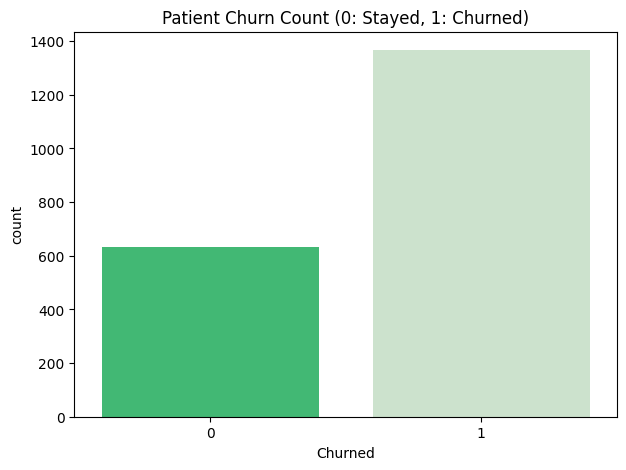

In [3]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Churned', data=df_churn, palette=['#2ECC71', '#C8E6C9'])
plt.title('Patient Churn Count (0: Stayed, 1: Churned)', color='black')
plt.show()

<div style="background-color: #C8E6C9; padding: 15px; border-left: 5px solid #2E7D32; border-radius: 8px; margin-bottom: 20px;"> <p style="color: #000000; font-weight: bold; margin: 0;">Block 4: Analyzing how HCAHPS satisfaction scores impact the likelihood of leaving.</p> </div>

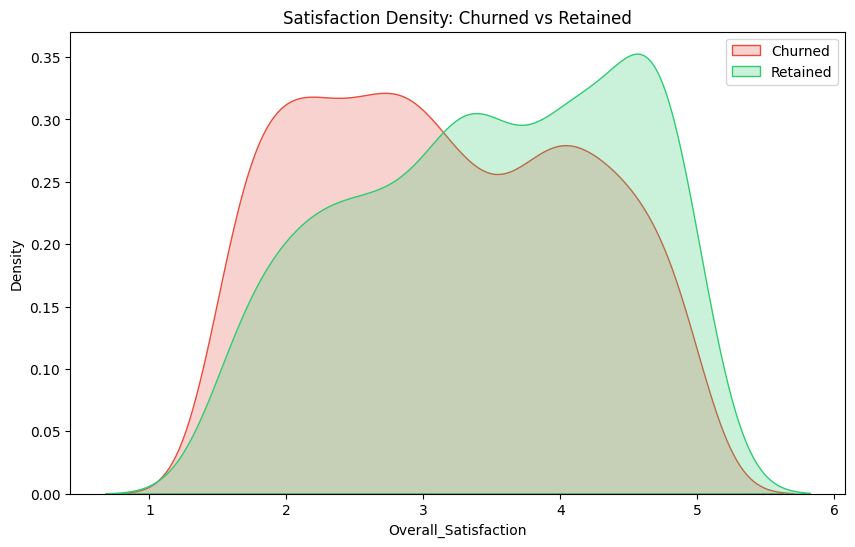

In [4]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_churn[df_churn['Churned'] == 1]['Overall_Satisfaction'], label='Churned', fill=True, color='#E74C3C')
sns.kdeplot(df_churn[df_churn['Churned'] == 0]['Overall_Satisfaction'], label='Retained', fill=True, color='#2ECC71')
plt.title('Satisfaction Density: Churned vs Retained', color='black')
plt.legend()
plt.show()

<div style="background-color: #C8E6C9; padding: 15px; border-left: 5px solid #2E7D32; border-radius: 8px; margin-bottom: 20px;"> <p style="color: #000000; font-weight: bold; margin: 0;">Block 5: Examining the relationship between medical costs and churn.</p> </div>

/tmp/ipykernel_17/526594683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churned', y='Avg_Out_Of_Pocket_Cost', data=df_churn, palette='Greens')


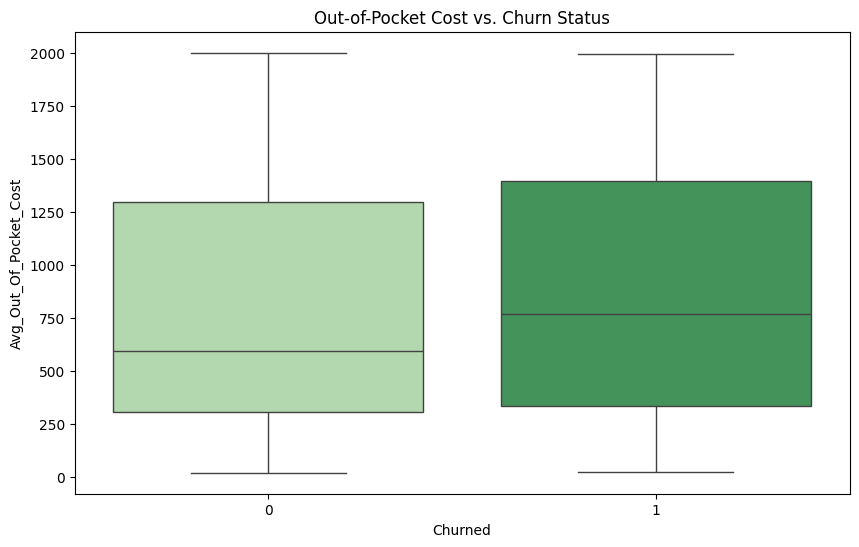

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churned', y='Avg_Out_Of_Pocket_Cost', data=df_churn, palette='Greens')
plt.title('Out-of-Pocket Cost vs. Churn Status', color='black')
plt.show()

<div style="background-color: #C8E6C9; padding: 15px; border-left: 5px solid #2E7D32; border-radius: 8px; margin-bottom: 20px;"> <p style="color: #000000; font-weight: bold; margin: 0;">Block 6: Heatmap to identify strong predictors of churn among numerical features.</p> </div>

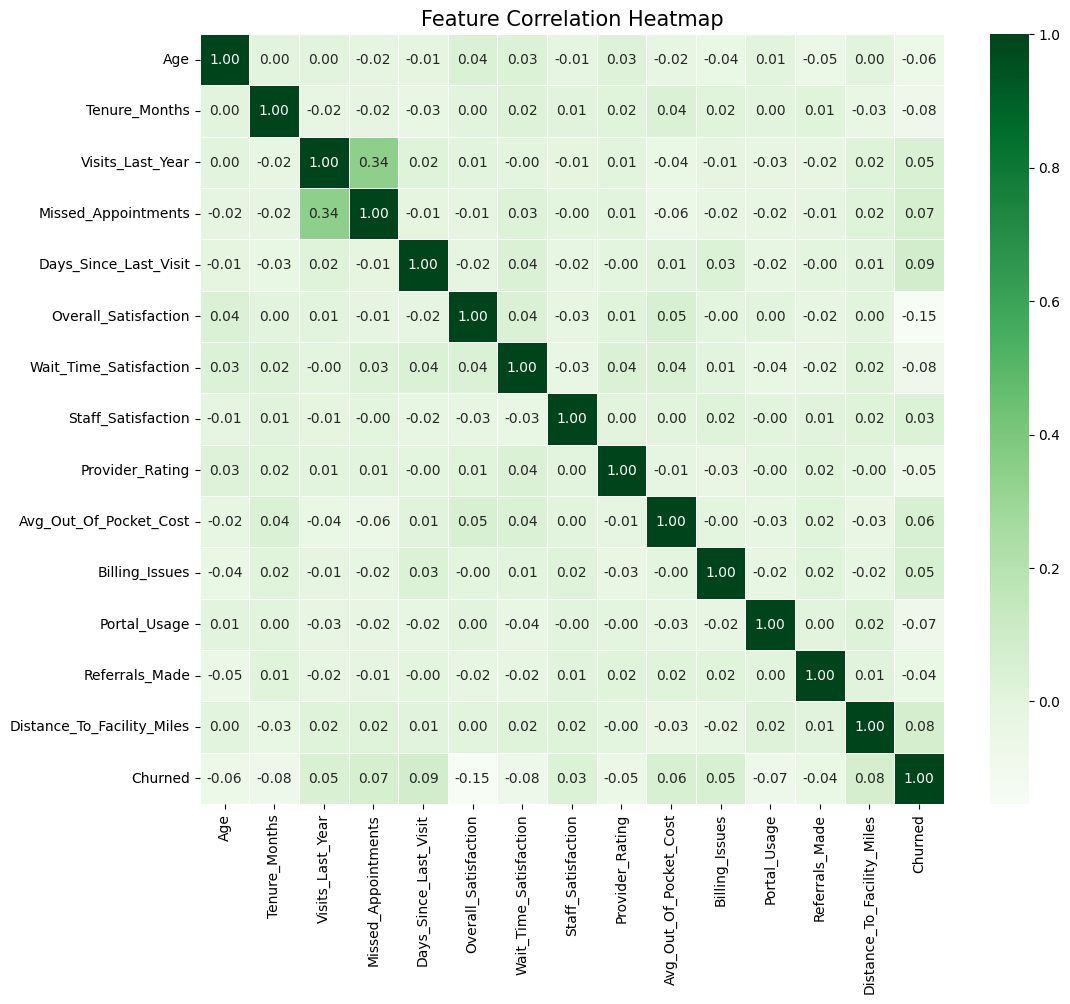

In [6]:
plt.figure(figsize=(12, 10))
corr = df_churn.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Greens', linewidths=0.5)
plt.title('Feature Correlation Heatmap', color='black', fontsize=15)
plt.show()

<div style="background-color: #C8E6C9; padding: 15px; border-left: 5px solid #2E7D32; border-radius: 8px; margin-bottom: 20px;"> <p style="color: #000000; font-weight: bold; margin: 0;">Block 7: Converting Specialty and Gender into machine-readable numeric formats.</p> </div>

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Category handling
categorical_cols = ['Gender', 'Specialty', 'Insurance_Type']
for col in categorical_cols:
    df_churn[col] = le.fit_transform(df_churn[col])

**<div style="background-color: #C8E6C9; padding: 15px; border-left: 5px solid #2E7D32; border-radius: 8px; margin-bottom: 20px;"> <p style="color: #000000; font-weight: bold; margin: 0;">Block 8: Removing non-predictive IDs and dates before model training.</p> </div>**

In [8]:
X = df_churn.drop(['PatientID', 'Last_Interaction_Date', 'Churned', 'State'], axis=1)
y = df_churn['Churned']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}")

Training samples: 1600


In [10]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

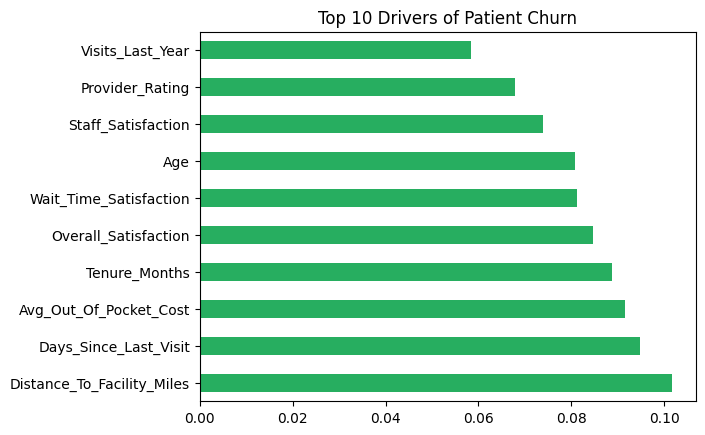

In [12]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='#27AE60')
plt.title('Top 10 Drivers of Patient Churn', color='black')
plt.show()